<a href="https://colab.research.google.com/github/Supritha04/Pytorch/blob/main/DAY5withPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DAY 5**
**PyTorch Workflow**

In [1]:
things_to_learn={1: "data (prepare and load)",
                 2: "build model",
                 3: "fitting the model to data(training)",
                 4: "making predictions and evaluating a model(inference)",
                 5:"saving and loading a model",
                 6:"putting it all together"}
things_to_learn

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for nueral network
import matplotlib.pyplot as plt
torch.__version__

'2.1.0+cu121'

### 1. Data (preparing and Loading)

Data can be anything
* Excel spreadsheet
* Images
* Videos
* Audio
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

In [3]:
weight=0.7
bias=0.3
# create data
start=0
end=1
step=0.02
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+10
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[10.0000],
         [10.0140],
         [10.0280],
         [10.0420],
         [10.0560],
         [10.0700],
         [10.0840],
         [10.0980],
         [10.1120],
         [10.1260]]))

In [4]:
len(x),len(y)

(50, 50)

### Splitting data into training and test sets

In [5]:
# Create a train/test split
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

In [6]:
x_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[10.0000],
         [10.0140],
         [10.0280],
         [10.0420],
         [10.0560],
         [10.0700],
         [10.0840],
         [10.0980],
         [10.1120],
         [10.1260],
         [10.1400],
         [10.1540]

Visualising data

In [7]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  plt.legend(prop={"size":14})

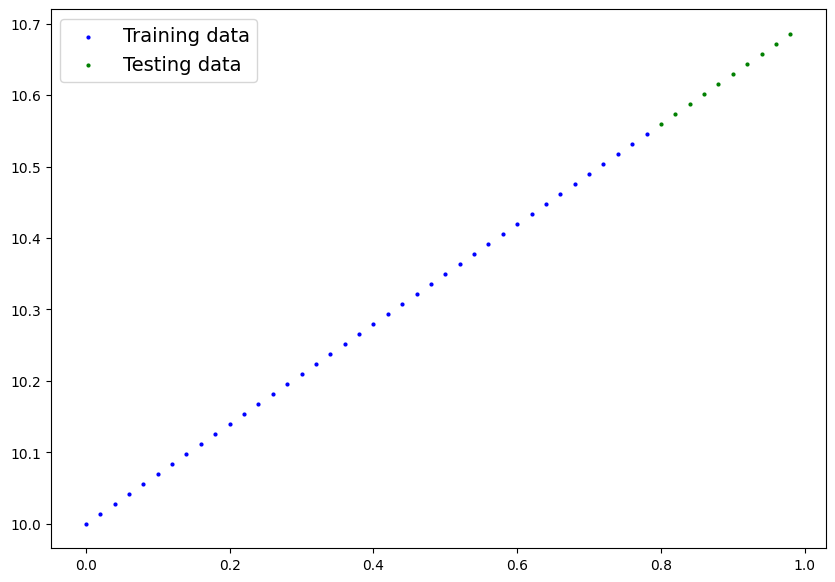

In [8]:
plot_predictions()

### 2. Build Model

In [9]:
# Linear regression model class
class LinearRegressionMode(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self,x:torch.Tensor)->torch.Tensor:
      return self.weights*x+self.bias

PyTorch building model essentials
* torch.nn
* torch.nn.Parameter
* torch.nn.Module
* torch.optim
* def forward()